In [36]:
'''A simple ABC rejection sampler for a baseline comparision of learning static parameters.'''

'A simple ABC rejection sampler for a baseline comparision of learning static parameters.'

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
'''Tau leaping model so we have some stochasticity. '''

days = 100
delta_t = 0.1 
rng = np.random.default_rng(0)

def model(theta,rng,*,days,delta_t): 
    beta,gamma = theta

    S = np.zeros(days * int(1/delta_t))
    I = np.zeros(days * int(1/delta_t))
    R = np.zeros(days * int(1/delta_t))

    #Initial condition
    S[0] = 500
    I[0] = 5
    R[0] = 0

    N = S[0] + I[0] + R[0]

    for t in range(1,int(1/delta_t) * days): 

        #Rate equations
        dN_SI = rng.poisson(beta * (S[t-1] * I[t-1]/N) * delta_t)
        dN_IR = rng.poisson(I[t-1] * gamma * delta_t)

        S[t] = S[t-1] - dN_SI
        I[t] = I[t-1] + dN_SI - dN_IR
        R[t] = R[t-1] + dN_IR

    return (S,I,R) 

theta = (0.3,0.1) #Real parameters
_,data_full,_ = model(theta,rng,days = days,delta_t = delta_t)



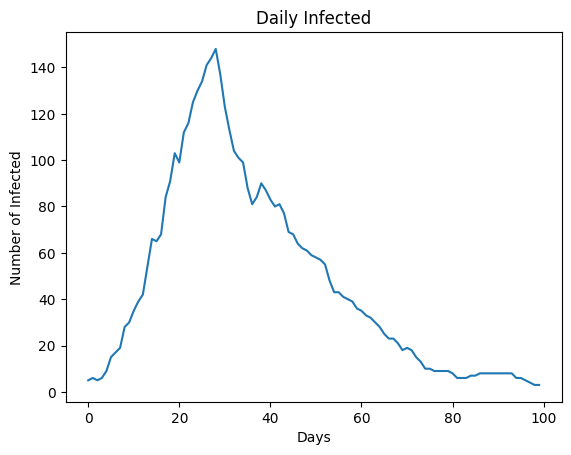

In [39]:
#Extract the data daily
data_real = data_full[::int(1/delta_t)]

plt.title('Daily Infected')
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.plot(np.arange(0,days,1),data_real)

In [42]:
'''ABC rejection algorithm'''

iterations = 50_000
tolerance_parameter = 200

theta_accepted = []
data_accepted = []

failures = 0
for iter in range(1,iterations):

    if(iter % 1000 == 0):
       print(f"Number of accepted parameter sets: {len(theta_accepted)}.\n Number of failed model runs: {failures}.")


    try: 
        #Make a proposal
        theta_prop = rng.uniform(0.,0.5,size = (2,))

        _,data_sim,_ = model(theta_prop,rng,days = days,delta_t = delta_t)
        data_sim = data_sim[::int(1/delta_t)]

        #Euclidean distance 
        distance = np.sqrt(np.sum((data_real - data_sim)**2))

        #Accept-reject
        if(distance < tolerance_parameter): 
            theta_accepted.append(theta_prop)
            data_accepted.append(data_sim)

    except: 
        failures = failures + 1



Number of accepted parameter sets: 8.
 Number of failed model runs: 9.
Number of accepted parameter sets: 24.
 Number of failed model runs: 18.
Number of accepted parameter sets: 43.
 Number of failed model runs: 31.
Number of accepted parameter sets: 48.
 Number of failed model runs: 44.
Number of accepted parameter sets: 55.
 Number of failed model runs: 59.
Number of accepted parameter sets: 68.
 Number of failed model runs: 77.
Number of accepted parameter sets: 80.
 Number of failed model runs: 97.
Number of accepted parameter sets: 90.
 Number of failed model runs: 106.
Number of accepted parameter sets: 104.
 Number of failed model runs: 117.
Number of accepted parameter sets: 120.
 Number of failed model runs: 132.
Number of accepted parameter sets: 136.
 Number of failed model runs: 151.
Number of accepted parameter sets: 142.
 Number of failed model runs: 160.
Number of accepted parameter sets: 150.
 Number of failed model runs: 175.
Number of accepted parameter sets: 165.
 N

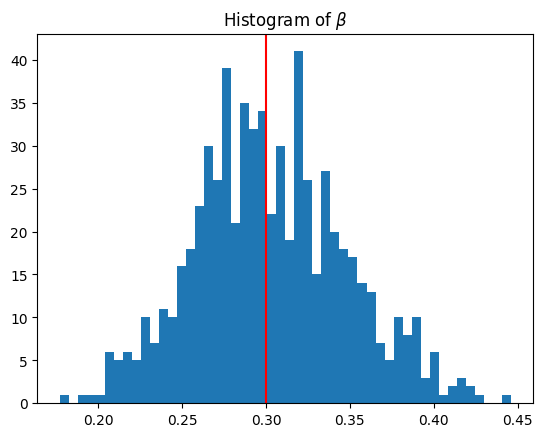

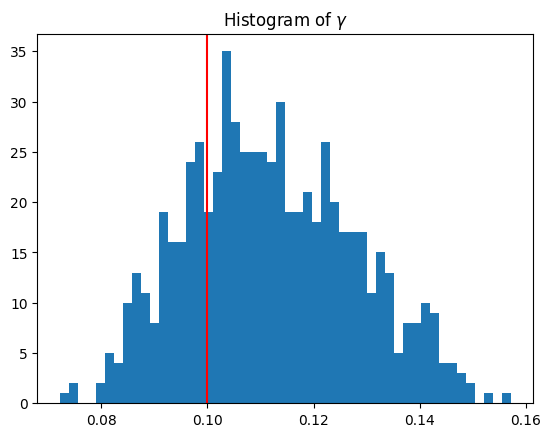

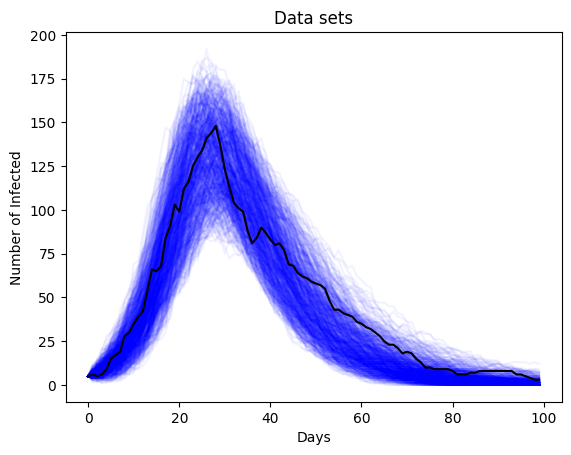

In [ ]:
theta_accepted = np.array(theta_accepted)
data_accepted = np.array(data_accepted)

plt.title('Histogram of $\\beta$')
plt.hist(theta_accepted[:,0],bins = 50,density = True)
plt.axvline(theta[0],color = 'red')
plt.show()

plt.title('Histogram of $\\gamma$')
plt.hist(theta_accepted[:,1],bins = 50,density = True)
plt.axvline(theta[1],color = 'red')
plt.show()

plt.title('Data sets')
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.plot(np.arange(0,days,1),data_accepted.T,color = 'blue',alpha = 0.05)
plt.plot(np.arange(0,days,1),data_real,color = 'black')
plt.show()